<a href="https://colab.research.google.com/github/JoehIreri/Supervised-Learning-Decision-Tree/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETES DATASET

In [1]:
import pandas as pd
Joeh = pd.read_csv('/content/diabetes.csv')
print("Shape of the dataset:", Joeh.shape)
Joeh.head(20)

Shape of the dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


SPLITTING THE DATASET INTO TRAINING AND TESTING

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Load the dataset
Joeh = pd.read_csv('diabetes.csv')
#Split the data into features (X) and labels (y)
X = Joeh.drop('Outcome', axis=1)
y = Joeh['Outcome']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BUILDING THE DECISION TREE MODEL

In [3]:
#Initialize the decision tree classifier
geo= DecisionTreeClassifier(criterion='entropy',random_state=42)
#clf = DecisionTreeClassifier(criterion='gini',random_state=42)
#Train the model on the training data
geo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

USE THE TRAINED MODEL TO MAKE PREDICTIONS ON THE TEST DATA

In [4]:
#Make predictions on the testing set
y_pred = geo.predict(X_test)
print (y_pred)

[0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0]


EVALUATING THE MODEL

In [5]:
#Calculate the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7207792207792207


In [8]:
#Evaluate the model performance
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
[[76 23]
 [20 35]]


VISUALIZING THE DECISION TREE

<function matplotlib.pyplot.show(close=None, block=None)>

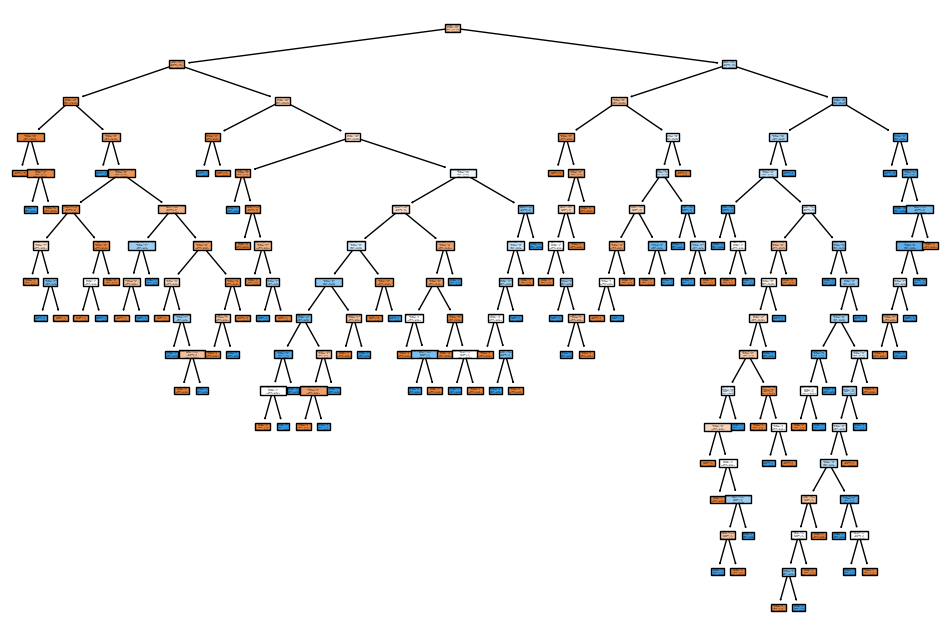

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(geo, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show

SAVING THE MODEL

LOADING THE MODEL TO MAKE A PREDICTION USING MY DATA

In [18]:

import joblib
from sklearn.tree import DecisionTreeClassifier
# Assuming 'geo' is my trained DecisionTreeClassifier model
geo = DecisionTreeClassifier(random_state=42)
geo.fit(X_train, y_train)
# Save the trained model to a file
joblib.dump(geo, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [19]:
import joblib
import pandas as pd
#Load the saved model
loaded_model = joblib.load('decision_tree_model.pkl')
#prepare the new data with attributes names
new_data = pd.DataFrame({
    'Pregnancies': [2,4, 3, 6],
    'Glucose': [120, 100, 90, 130],
    'BloodPressure': [80, 70, 90, 50],
    'SkinThickness': [49, 39, 29, 59],
    'Insulin': [45, 50, 40, 60],
    'BMI': [28.5, 40.2, 35.5, 32.0],
    'DiabetesPedigreeFunction': [0.4, 0.5, 0.3, 0.6],
    'Age': [30, 35, 28,40]
})
# Make predictions on the new data
predictions = loaded_model.predict(new_data)
# Create a mapping from 0 to "Not Diabetic" and 1 to "Diabetic"
diabetes_mapping = {0: "0-Not Diabetic", 1: "1-Diabetic"}
#Print the predictions with labels
for i, prediction in enumerate(predictions):
  label = diabetes_mapping[prediction]
  print(f"Data {i + 1}: Predicted Outcome - {label}")

Data 1: Predicted Outcome - 0-Not Diabetic
Data 2: Predicted Outcome - 0-Not Diabetic
Data 3: Predicted Outcome - 0-Not Diabetic
Data 4: Predicted Outcome - 1-Diabetic
